In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('listings.csv')
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

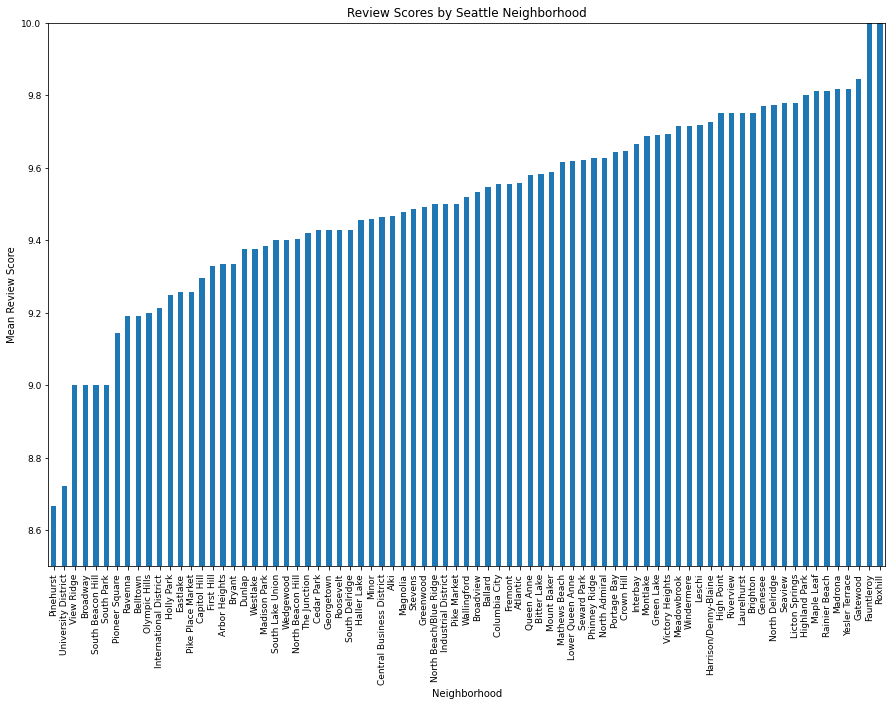

In [98]:
# property type and review scores
neighborhood_review = df.groupby(['neighbourhood']).mean()['review_scores_value'].sort_values().dropna()
neighborhood_review.plot.bar(
    fontsize = 9,
    title = 'Review Scores by Seattle Neighborhood',
    xlabel = 'Neighborhood', 
    ylabel = 'Mean Review Score', 
    ylim = (8.5,10),
    figsize = (15, 10))
plt.show()

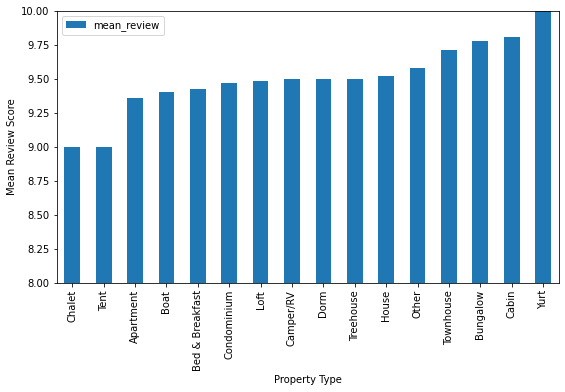

In [94]:
# property type and review scores
property_type_review = (df.groupby(['property_type']).mean()['review_scores_value'].sort_values().dropna()).to_frame('mean_review') 

property_type_review.plot.bar(
    title = 'Review Scores by Property Type',
    xlabel = 'Property Type', 
    ylabel = 'Mean Review Score', 
    ylim = (8,10),
    figsize = (9, 5))
plt.show()


In [5]:
import numpy as np

# Correlation between cleanliness review score and overall review scores?
X = df.review_scores_cleanliness.fillna(5).values.reshape(len(df.review_scores_cleanliness.values),1)
y = df.review_scores_value.fillna(5).values.reshape(len(df.review_scores_value.values),1)

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

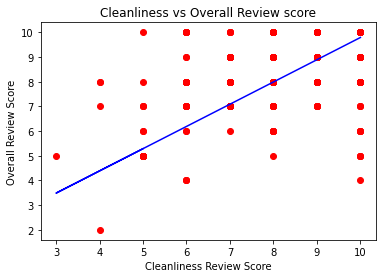

In [7]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regr.predict(X), color = 'blue')
plt.title('Cleanliness vs Overall Review score')
plt.xlabel('Cleanliness Review Score')
plt.ylabel('Overall Review Score')
plt.show()